In [176]:
from pioran.acvf import Exponential
from pioran.psd import Lorentzian,Matern32PSD
from pioran.simulate import Simulations
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
plt.style.use("https://github.com/mlefkir/beauxgraphs/raw/main/beautifulgraphs_colblind.mplstyle")

plt.rcParams.update({
    "figure.facecolor":  (1.0, 0.0, 0.0, 0.0), 
    "axes.facecolor":    (0.0, 1.0, 0.0, 0.0),  
    "savefig.facecolor": (0.0, 0.0, 1.0, 0.0), 
})

In [194]:
expo = Exponential([1,1e-2])+Exponential([1/60,1e-2])+Exponential([1/2,1e-2])
loren = Lorentzian([0,1,1e-2])+Lorentzian([1/50,.2,1e-2])+Lorentzian([1/2,1,1])
lor = Lorentzian([0,.12,1e-2])
mat = Matern32PSD([5000,10])
T = 500
dT = 2
S_low = 20
S_high = 20
Simu_psd = Simulations(T,dT,model=loren,S_low=S_low,S_high=S_high)
Simu_psd2 = Simulations(T,dT,model=lor,S_low=S_low,S_high=S_high)
Simu_psd3 = Simulations(T,dT,model=mat,S_low=S_low,S_high=S_high)
Simu_acvf = Simulations(T,dT,model=expo)



In [183]:
fig 

Array([ 7.03729442e+01,  7.02299444e+01,  6.99796838e+01, ...,
       -6.25464902e-06, -6.25463858e-06, -6.25464899e-06], dtype=float64)

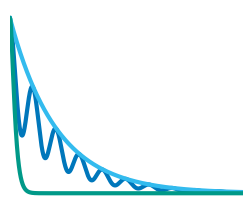

In [206]:
Simu_psd.simulate(method="GP")
Simu_psd2.simulate(method="GP")
r,r,r=Simu_psd3.simulate(method="GP")

fig, ax = plt.subplots(1,1,figsize=(3,2.5))
ax.plot(Simu_psd.tau,Simu_psd.acvf/Simu_psd.acvf[0],label="PSD",lw=3)
ax.plot(Simu_psd2.tau,Simu_psd2.acvf/Simu_psd2.acvf[0],label="PSD",lw=3)
ax.plot(Simu_psd3.tau,Simu_psd3.acvf/Simu_psd3.acvf[0],label="PSD",lw=3)
ax.set_xlim(0,T)
ax.set_axis_off()
fig.savefig('acvf.png',dpi=300,bbox_inches='tight')

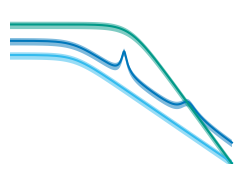

In [180]:
fig, ax = plt.subplots(1,1,figsize=(3,2.))
ax.loglog(Simu_psd.frequencies,Simu_psd.psd,label='PSD')
err_psd = Simu_psd.psd*0.5
ax.fill_between(Simu_psd.frequencies,Simu_psd.psd-err_psd,Simu_psd.psd+err_psd,alpha=0.5)
err_psd2 = Simu_psd2.psd*0.5
ax.loglog(Simu_psd2.frequencies,Simu_psd2.psd,label='PSD')
ax.fill_between(Simu_psd2.frequencies,Simu_psd2.psd-err_psd2,Simu_psd2.psd+err_psd2,alpha=0.5)
err_psd3 = Simu_psd3.psd*0.5
ax.loglog(Simu_psd3.frequencies,Simu_psd3.psd,label='PSD')
ax.fill_between(Simu_psd3.frequencies,Simu_psd3.psd-err_psd3,Simu_psd3.psd+err_psd3,alpha=0.5)
ax.set_ylim(1e-4,1e6)
ax.set_axis_off()
fig.savefig('psd.pdf',dpi=300,bbox_inches='tight')


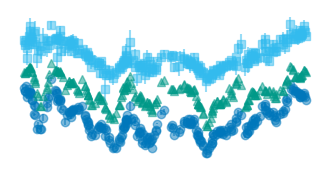

In [179]:
t,ts,ts_err = Simu_psd.simulate(method='TK',irregular_sampling=True)
t_2,ts_2,ts_err_2 = Simu_psd2.simulate(method='TK',irregular_sampling=True)
t_3,ts_3,ts_err_3 = Simu_psd3.simulate(method='TK',irregular_sampling=True)

fig, ax = plt.subplots(1,1,figsize=(4,2))
ax.errorbar(t,ts/jnp.mean(ts),yerr=ts_err/jnp.mean(ts),label='PSD',fmt='o',alpha=0.5)
ax.errorbar(t_2,ts_2/jnp.mean(ts_2)+.9,yerr=ts_err_2/jnp.mean(ts_2),label='PSD',fmt='s',alpha=0.5)
ax.errorbar(t_3,ts_3/jnp.mean(ts_3)+.4,yerr=ts_err_3/jnp.mean(ts_3),label='PSD',fmt='^',alpha=0.5)
ax.set_axis_off()
fig.savefig('ts.png',dpi=300,bbox_inches='tight')